## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет экспоненту от матрицы размера $2 \times 2$, используя определение экспоненты через предел

$$
\lim _{s \rightarrow \infty}(I+A / s)^s ;  s = 2^N
$$

Элементами матрицы могут быть любые комплексные числа. Возведение матрицы в квадрат напишите самостоятельно, написав его поэлементно, использовав 5 умножений вместо 8 для стандартного способа умножения двух матриц.

Возьмите любую матрицу на ваш выбор и продемонстрируйте, как падает ошибка по спектральной норме при росте N, построив график зависимости ошибки от N. Дальнейшую часть задания делайте при каком-то достаточно большом N, при котором относительная ошибка очень мала.


2. Возьмите какую-то одну матрицу, экспоненту для которой вы знаете точно, с большим числом обусловленности, сгенерируйте 1000 случайных матриц для малых возмущений, элементы которых вещественные числа, распределенные равномерно в диапазоне от -0.01 до 0.01 (если элементы вашей матрицы довольно малы, то можете взять в значительно меньшем диапазоне). Постройте график спектральной нормы разницы точного значения экспоненты из этой матрицы и вычисляемой экспоненты из суммы матрицы и её возмущения, в зависимости от нормы возмущения.

3. Затем возьмите матрицу с маленьким числом обусловленности, экспоненту для которой вы знаете точно, и проделайте то же самое, что в пункте 2.

4. Постройте график зависимости времени работы программы в зависимости от количества вычисляемых экспонент для обоих предыдущих пунктов.

5. Вычислите функцию $f(t) = || e^{t A} ||$ (норма Фробениуса), используя формулы

$$
e^{t A}=\mathrm{Te}^{\mathrm{tJ}} \mathrm{~T}^{-1}
$$

$$
exp(\left[\begin{array}{cc}
\lambda t & t \\
0 & \lambda t
\end{array}\right]) = \left[\begin{array}{cc}
e^{\lambda t} & \frac{t e^{\lambda t}}{1!} \\
0 & e^{\lambda t}
\end{array}\right]
$$

$$
exp(\left[\begin{array}{cc}
a t & 0 \\
0 & b t
\end{array}\right]) = \left[\begin{array}{cc}
e^{a t} & 0 \\
0 & e^{b t}
\end{array}\right]
$$

Матрицу возьмите произвольную. Постройте график от t.


## Part 1

In [5]:
import sympy as smp

In [6]:
import numpy as np

In [7]:
def exponent(matrix, N):
    s = smp.symbols('s')
    E = np.eye(2)
    expr = np.zeros((2,2))
    for i in range (0, 2):
        for j in range (0, 2):
            expr[i][j] = float(np.array((smp.Limit(np.array(smp.Matrix((E+matrix/s)**s))[i][j]+1e-10, s, 2**N).doit())).astype(np.float64))
    return expr

In [8]:
A = np.array([[2, 0],[0, 3]])
exponent(A, 10)

array([[7.37465716e+00, 1.00000000e-10],
       [1.00000000e-10, 1.99976353e+01]])

Возьмем трушную матричную экспоненту 

In [9]:
A_true = np.array([[np.exp(2), 0], [0, np.exp(3)]])
difference = []
N_array = np.linspace(0, 10, 10)
for i in range (0, 10):
    calculated = exponent(A, i)
    difference.append(np.linalg.norm(calculated-A_true, 2))

In [10]:
import matplotlib.pyplot as plt

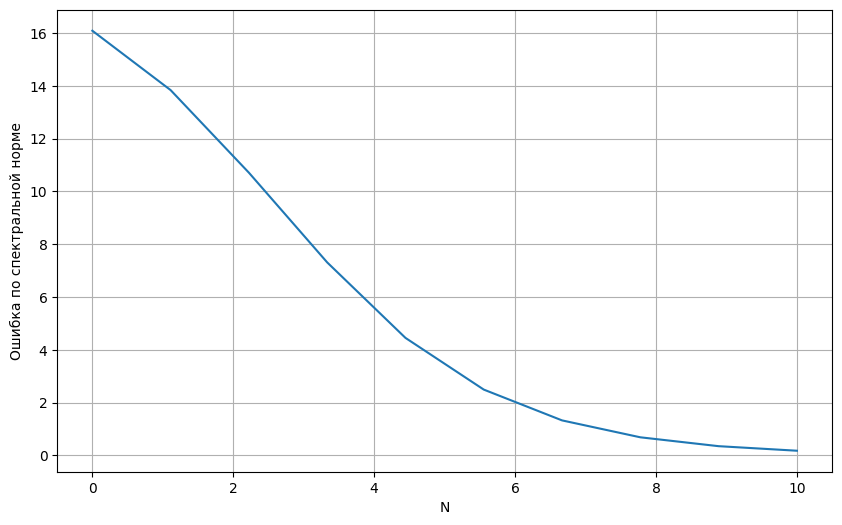

In [11]:
plt.figure(figsize=(10,6))
plt.xlabel("N")
plt.ylabel("Ошибка по спектральной норме")
plt.grid(True)
plt.plot(N_array, difference)

## Part 2

In [12]:
B = np.array([[100, 0],[0, 0.01]])
B_true_exp = np.array([[np.exp(100),0],[0, np.exp(0.01)]])

In [18]:
fluctuation = []
fluctuation_norm = []
difference_high = []
for i in range (0, 50):
    osc = np.random.uniform(-0.01, 0.01, (2, 2))
    fluctuation.append(osc)
    fluctuation_norm.append(np.linalg.norm(osc, 2))

for fluc in fluctuation:
    difference_high.append(np.linalg.norm(exponent(B+fluc, 10) - B_true_exp, 2))

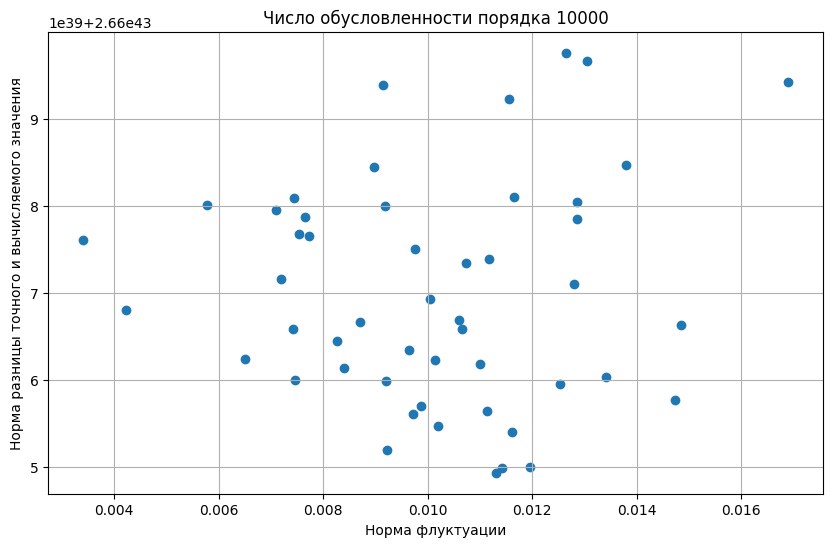

In [19]:
plt.figure(figsize=(10,6))
plt.xlabel('Норма флуктуации')
plt.ylabel('Норма разницы точного и вычисляемого значения')
plt.title('Число обусловленности порядка 10000')
plt.grid(True)
plt.scatter(fluctuation_norm, difference_high)

## Part 3

In [27]:
C = np.array([[1, 0],[0, 2]])
C_true_exp = np.array([[np.exp(1),0],[0, np.exp(2)]])

In [21]:
difference_low = []
for fluc in fluctuation:
    difference_low.append(np.linalg.norm(exponent(C+fluc, 10) - C_true_exp, 2))

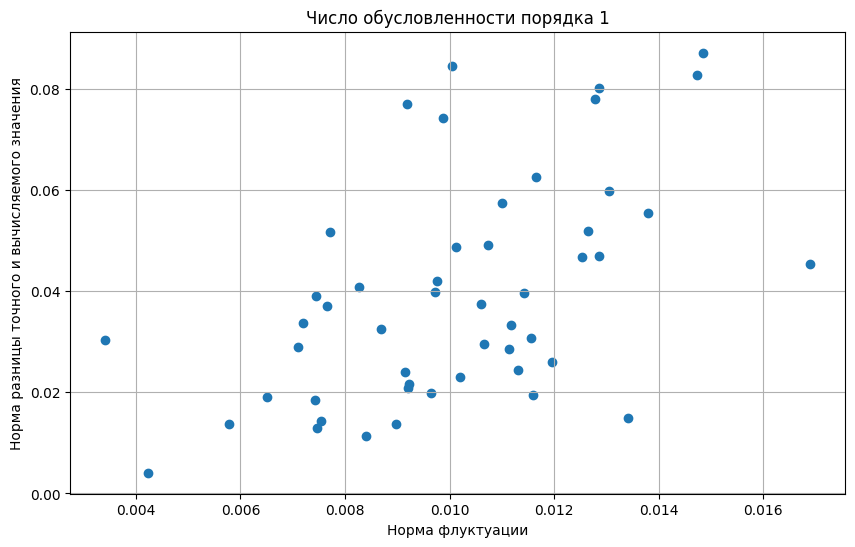

In [22]:
plt.figure(figsize=(10,6))
plt.xlabel('Норма флуктуации')
plt.ylabel('Норма разницы точного и вычисляемого значения')
plt.title('Число обусловленности порядка 1')
plt.grid(True)
plt.scatter(fluctuation_norm, difference_low)

## Part 4

In [1]:
import time

In [24]:
def generator(mat, array, text=''):
    amount = np.linspace(0,np.shape(array)[0], np.shape(array)[0])
    time_array = []
    start_time = time.time()
    for matrix in array:
        object = mat + matrix
        exp = exponent(object, 10)
        time_array.append(time.time()-start_time)
    plt.figure(figsize=(10,6))
    plt.xlabel('Количество посчитанных экспонент')
    plt.ylabel('Затраченное время, сек')
    plt.title(text)
    plt.grid(True)
    plt.plot(amount, time_array)

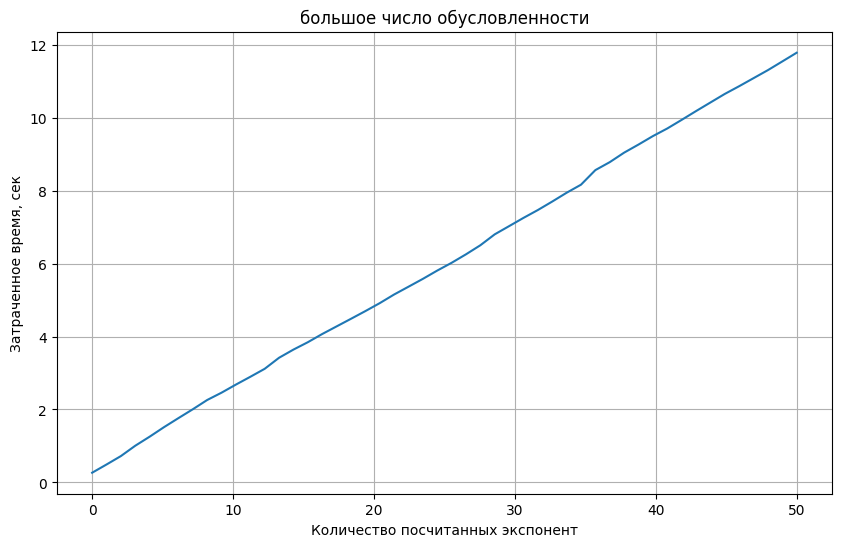

In [25]:
generator(B, fluctuation, text='большое число обусловленности')

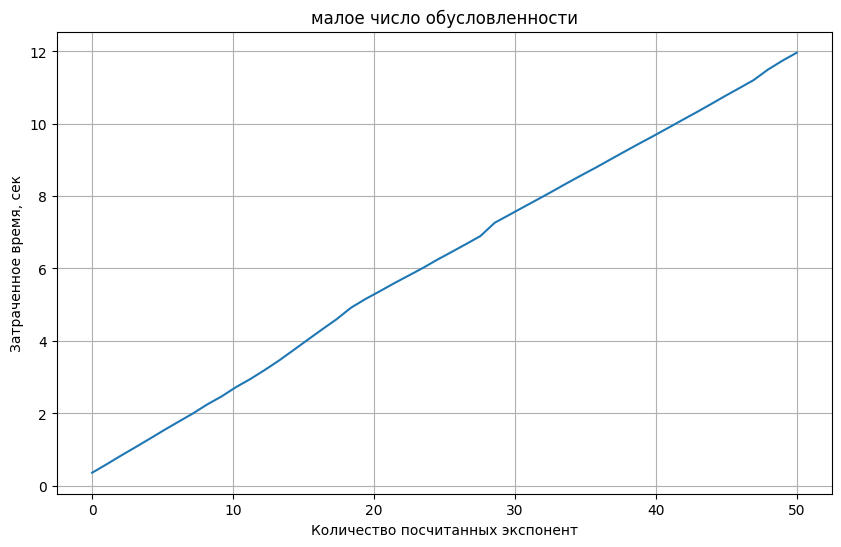

In [28]:
generator(C, fluctuation, text='малое число обусловленности')

В принципе видно, что функция зависимости линейная для обоих значений числа обусловленности

## Part 5

In [154]:
def f(t, matrix):
    T, J = (np.array(smp.Matrix(matrix).jordan_form())[0]).astype(complex), (np.array(smp.Matrix(matrix).jordan_form())[1]).astype(complex)
    if (J[0][0]) == (J[1][1]):
        e_tJ = np.array([[np.exp(t*(float(complex(J[0][0]).real)+float(complex(J[0][0]).imag))), t*np.exp(t*(float(complex(J[0][0]).real)+float(complex(J[0][0]).imag)))],[0, np.exp(t*(float(complex(J[0][0]).real)+float(complex(J[0][0]).imag)))]])
    else:
        e_tJ = np.array([[np.exp(t*(float(complex(J[0][0]).real)+float(complex(J[0][0]).imag))), 0],[0, np.exp(t*(float(complex(J[1][1]).real)+float(complex(J[1][1]).imag)))]])
    return np.linalg.norm(T@e_tJ@np.linalg.inv(T))

Матрица:
 [[-4  2]
 [ 3  4]]


C:\Users\Матвей\AppData\Local\Temp\ipykernel_23528\1052955363.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  e_tJ = np.array([[np.exp(t*(float(complex(J[0][0]).real)+float(complex(J[0][0]).imag))), 0],[0, np.exp(t*(float(complex(J[1][1]).real)+float(complex(J[1][1]).imag)))]])


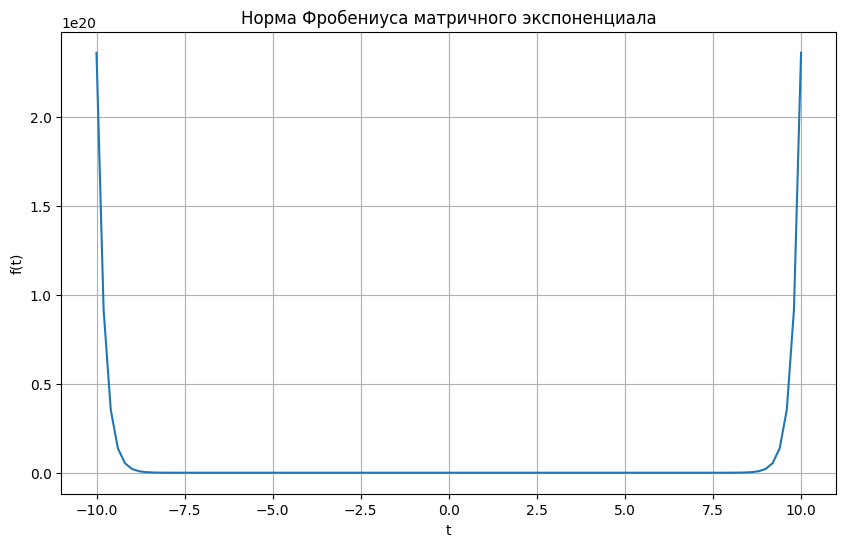

In [166]:
matrix = np.matrix(np.random.randint(-5, 5, (2,2)))
print('Матрица:\n', matrix)
t = np.linspace(-10, 10, 100)
y = f(t, matrix)
plt.figure(figsize=(10,6))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Норма Фробениуса матричного экспоненциала')
plt.grid(True)
plt.plot(t, y)

## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (4 балла).

Мы хотим приблизить функцию $f(x,y)$ на квадрате $0 <= x <= 1; 0 <= y <= 1$ и проверить, насколько точно аппроксимация совпадает с этой функций на таблице значений с шагом $0.05$ (проще говоря, с таблицей чисел 21 на 21).

$$
f(x,y) = sin(x) \cdot cos(y) \cdot \ln(x+y+1)
$$

Проще говоря, мы ищем наилучшую аппроксимации среди моделей вида

$$
\check{y}(x, y)=g_{\mathbf{w}}(x, y)=\sum_{k=1}^m \mathbf{w}_k \cdot f_k(x, y)
$$

где $\left\{f_k(x, y)\right\}_{k=1}^m = \left\{sin(k_1 \cdot x) \cdot cos(k_2 \cdot y)\right\}_{k=1}^m$ -  набор из $m$ функций.

Здесь $m = 11^2, k_1 = 1 + (m-1) \ div \ 11, k_2 = (m-1) \ mod \ 11$ (остаток и целая часть от деления).

1. Постройте матрицу $X$ объект-признак размера $21^2 \times 11^2$ для этой задачи и визуализируйте ее.
2. Вычислите матрицу $X^T X$ и её число обусловленности. Оцените ошибку вычисления весов, исходя из машинной погрешности.
3. Найдите веса модели, использовав метод наименьших квадратов.
4. Постройте таблицу значений 21 на 21 с помощью модели и вычислите ошибку аппроксимации по спектральной норме.


## Part 1

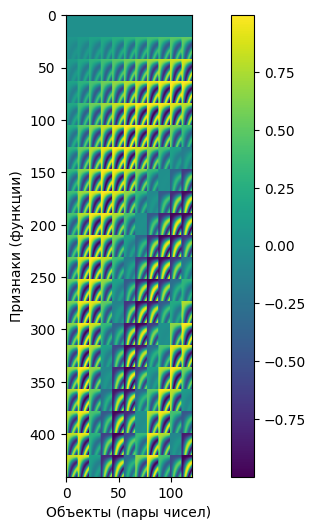

In [255]:
import itertools

x = np.linspace(0,1,21)
y = np.linspace(0,1,21)

table = np.array(list(itertools.product(x,y)))  # Таблица чисел 21*21

m=121

X = np.array([[np.sin((1+(k-1)//11)*x)*np.cos(((k-1)%11)*y) for k in range(1,m+1)] for (x,y) in table])

plt.figure(figsize=(10, 6))
plt.imshow(X)
plt.colorbar()
plt.xlabel('Объекты (пары чисел)')
plt.ylabel('Признаки (функции)')
plt.show()

## Part 2

Получим требуемую матрицу и ее число обусловленности

In [284]:
A = X.T@X
A, np.linalg.cond(A)

(array([[ 1.22038118e+02,  1.02256695e+02,  5.44947972e+01, ...,
         -1.49034549e+00, -4.91006309e-01,  5.11830843e-01],
        [ 1.02256695e+02,  8.82664575e+01,  5.38714134e+01, ...,
         -9.56185974e-01, -4.89257324e-01,  8.44909556e-02],
        [ 5.44947972e+01,  5.38714134e+01,  5.05638427e+01, ...,
          2.41442177e-01, -3.80688709e-01, -7.59368915e-01],
        ...,
        [-1.49034549e+00, -9.56185974e-01,  2.41442177e-01, ...,
          1.08610855e+02,  8.87363007e+01,  4.95252568e+01],
        [-4.91006309e-01, -4.89257324e-01, -3.80688709e-01, ...,
          8.87363007e+01,  1.10565233e+02,  9.83984267e+01],
        [ 5.11830843e-01,  8.44909556e-02, -7.59368915e-01, ...,
          4.95252568e+01,  9.83984267e+01,  1.18373510e+02]]),
 7.206171422035196e+17)

Число обусловленности ну очень большое! В чем причина?

In [285]:
np.linalg.matrix_rank(A)

59

Матрица вырождена, так как ее ранг составляет лишь 59, когда размерность матрицы 121*121

Попробуем решить эту проблему, используя метод главных компонент

In [ ]:
Y = np.array([np.sin(x)*np.cos(y)*np.log(x+y+1) for (x,y) in table])  # Функция, которую хотим аппроксимировать

Разбиваем на обучающую и тестовую выборки:

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=13)

In [288]:
import seaborn as sns

Отбросим лишние признаки, отавив только 59:

<AxesSubplot: >

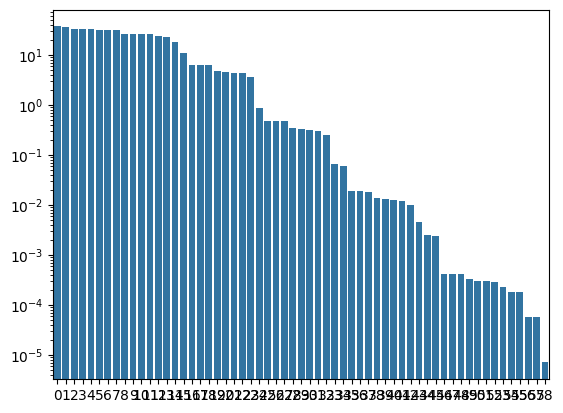

In [289]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 59) 
pca.fit(X)
sing_values = pca.singular_values_

sns.barplot(x = np.arange(len(sing_values)), y = sing_values, log = True)

Видно, как сингулярные числа убывают с ростом номера признака, и в целом веса первых 10 признаков уже сильно больше весов признаков с номером выше 30. Обрежем ещё до 20 признаков

<AxesSubplot: >

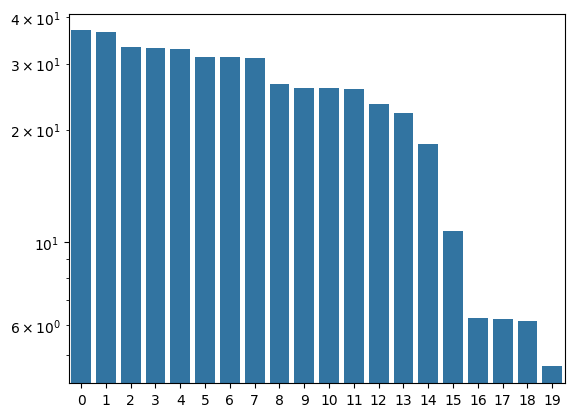

In [290]:
pca = PCA(n_components = 20) 
pca.fit(X)
sing_values = pca.singular_values_

sns.barplot(x = np.arange(len(sing_values)), y = sing_values, log = True)

Как будто начиная с номера 19, сингулярные числа уже не так велики, допустим, что нас такая обрезка устраивает

In [ ]:
X_new = pca.transform(X)  # Трансформация матрицы объект-признак (обрезка всех признаков, после 20) 

In [293]:
X_new.T@X_new, np.linalg.cond(X_new.T@X_new)

(array([[ 1.35331112e+03, -4.83169060e-13,  8.34887715e-14,
         -5.16031662e-13,  5.19584376e-13,  3.99680289e-15,
         -3.73034936e-14, -2.48689958e-14,  9.23705556e-14,
         -1.27897692e-13,  3.10862447e-14, -3.66373598e-14,
         -2.02504680e-13,  3.77475828e-14, -1.12798659e-13,
          2.16715534e-13,  1.52766688e-13, -5.41788836e-14,
         -2.08499884e-13, -3.28626015e-14],
        [-4.83169060e-13,  1.33461762e+03,  4.26325641e-14,
          1.25233157e-12, -6.90114632e-13,  8.79296636e-14,
         -3.55271368e-14, -9.23705556e-14, -1.42108547e-13,
          1.13686838e-13, -7.37188088e-14,  5.32907052e-14,
          5.16919840e-13, -4.70734562e-14,  1.14575016e-13,
          3.05533376e-13, -1.14575016e-13,  5.99520433e-14,
          5.77315973e-14, -1.42108547e-14],
        [ 8.34887715e-14,  4.26325641e-14,  1.10602788e+03,
          5.04485342e-13,  8.24229573e-13, -4.19109192e-13,
          1.05693232e-12,  4.57411886e-13,  1.45661261e-13,
         -6.

Получили число обусловленности уже не $10^{17}$, а что-то нормальное (62)

Переходим к линейной регресии и нахождению весов обрезанной модели:

In [294]:
from sklearn.linear_model import LinearRegression

In [295]:
X_train_reduced = pca.transform(X_train) 
X_test_reduced = pca.transform(X_test)

In [296]:
model = LinearRegression()

In [297]:
model.fit(X_train_reduced, Y_train)

LinearRegression()

In [ ]:
model.coef_  # Веса модели

array([-0.07168   , -0.04597979, -0.00915336,  0.02368606, -0.01456444,
       -0.00174005,  0.00334949,  0.00466599,  0.04766659,  0.04831246,
       -0.010974  , -0.00645171, -0.0209806 ,  0.00456743,  0.00542865,
       -0.14644333, -0.01009318,  0.00508565,  0.02030271,  0.1233888 ])

## Part 4

In [ ]:
Y_pred = model.predict(X_test_reduced)
error = np.linalg.norm(Y_pred-Y_test, 2)
error

(0.4744886897573087, 0.4744886897573087)

Получили такое отклонение по спектральной норме (то же самое, что и RSS).

## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (3 балла).

Свести задачу решения системы нелинейных уравнений $\left\{\begin{array}{l}x^2-y^2=1, \\ x y^3-y=4\end{array}\right.$ к задаче поиска минимума.

1. Найдите минимум полученного функционала методом наискорейшего спуска.

2. Найдите минимум полученного функционала методом сопряженных градиентов.

3. Сравните эффективность этих методов - постройте графики зависимости точности от количества итераций.


## Наискорейший спуск

In [174]:
from scipy.optimize import minimize_scalar

In [196]:
def func(x,y):
    return (x**2-y**2-1)**2+(x*y**3-y-4)**2

def grad_func(x,y):
    return np.array([4*x*(x**2-y**2-1)+2*y**3*(x*y**3-y-4), -4*y*(x**2-y**2-1)+2*(3*x*y**2-1)*(x*y**3-y-4)])

In [199]:

def fastest_descent(func, grad_func, array, epsilon):
    
    s = 0
    while np.linalg.norm(grad_func(*array), 2) > epsilon:
        g = lambda alpha: func(*(array-alpha*grad_func(array[0], array[1])))
        alpha = minimize_scalar(g).x
        array = array - alpha*grad_func(array[0], array[1])
        s+=1
    return array, s

In [202]:
fastest_descent(func, grad_func, [1, 1], 1e-6)

(array([1.7665911 , 1.45631184]), 49)

In [203]:
fastest_descent(func, grad_func, [-1, -1], 1e-6)

(array([-1.57050208, -1.21098179]), 35)

## Сопряженные градиенты

In [204]:
def conjugate_gradients(func, grad_func, array, epsilon):
    g = lambda alpha: func(*(array-alpha*grad_func(*array)))
    alpha = minimize_scalar(g).x
    grad_old = grad_func(*array)
    array = array - alpha*grad_func(array[0], array[1])
    s=1

    while np.linalg.norm(grad_func(*array), 2) > epsilon:
        
        g = lambda alpha: func(*(array-alpha*(grad_func(*array)+grad_old*(grad_func(*array)@grad_func(*array)/(grad_old@grad_old)))))  # Алгоритм Флетчера-Ривса
        alpha = minimize_scalar(g).x  
        help = grad_old
        grad_old = grad_func(*array)                                                                                                                                     
        array = array-alpha*(grad_func(*array)+help*(grad_func(*array)@grad_func(*array)/(help@help)))     
        s+=1
    
    return array, s
                                                                                                                    


In [226]:
conjugate_gradients(func, grad_func, [1, 1], 1e-6)

(array([1.76659111, 1.45631184]), 7)

In [206]:
conjugate_gradients(func, grad_func, [-1, -1], 1e-6)

(array([-1.57050212, -1.21098178]), 8)

Как видим, сопряженные градиенты используют сильно меньше итераций для получения правильного ответа (7 и 8 вместо 49 и 35 соответственно для двух разных корней)

## Сравнение для первого корня

In [231]:
array_true = np.array([1.76659, 1.45631])


In [232]:
def fastest_descent_test(func, grad_func, array, array_true):
    
    amount = []
    error = []

    for i in range (1, 101):
        amount.append(i)
        g = lambda alpha: func(*(array-alpha*grad_func(array[0], array[1])))
        alpha = minimize_scalar(g).x
        array = array - alpha*grad_func(array[0], array[1])
        error.append(np.linalg.norm(array-array_true, 2))

    return amount, error
    
    

def conjugate_gradients_test(func, grad_func, array, array_true):
    g = lambda alpha: func(*(array-alpha*grad_func(*array)))
    alpha = minimize_scalar(g).x
    grad_old = grad_func(*array)
    array = array - alpha*grad_func(array[0], array[1])
    amount = [1]
    error = []
    error.append(np.linalg.norm(array-array_true, 2))

    for i in range (2, 101):
        
        g = lambda alpha: func(*(array-alpha*(grad_func(*array)+grad_old*(grad_func(*array)@grad_func(*array)/(grad_old@grad_old)))))  # Алгоритм Флетчера-Ривса
        alpha = minimize_scalar(g).x  
        help = grad_old
        grad_old = grad_func(*array)                                                                                                                                     
        array = array-alpha*(grad_func(*array)+help*(grad_func(*array)@grad_func(*array)/(help@help)))     
        error.append(np.linalg.norm(array-array_true, 2))
        amount.append(i)
    
    return amount, error


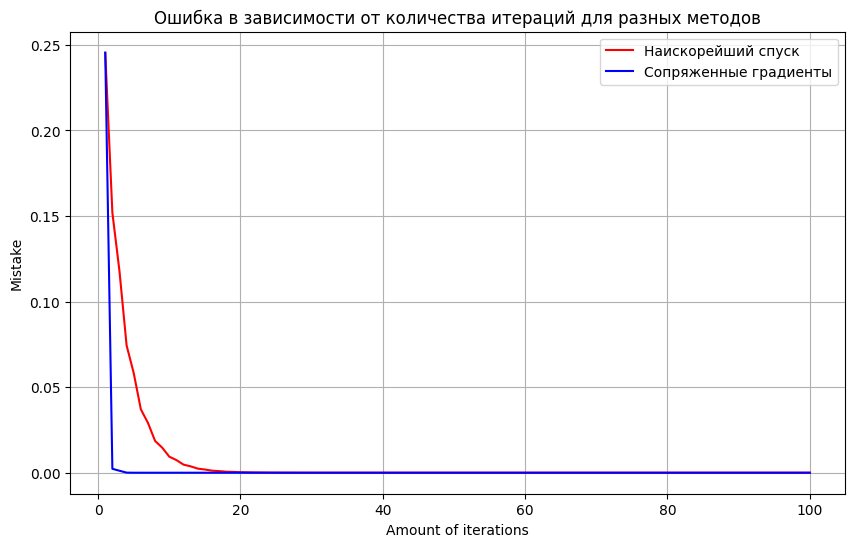

In [233]:
plt.figure(figsize=(10,6))
plt.xlabel('Amount of iterations')
plt.ylabel('Mistake')
plt.title('Ошибка в зависимости от количества итераций для разных методов')
plt.grid(True)
plt.plot(fastest_descent_test(func, grad_func, [1,1], array_true)[0], fastest_descent_test(func, grad_func, [1,1], array_true)[1], color='r', label='Наискорейший спуск')
plt.plot(conjugate_gradients_test(func, grad_func, [1,1], array_true)[0], conjugate_gradients_test(func, grad_func, [1,1], array_true)[1], color='b', label='Сопряженные градиенты')
plt.legend()
plt.show()

## Сравнение для второго корня

In [237]:
array_true_2 = np.array([-1.5705, -1.21098])

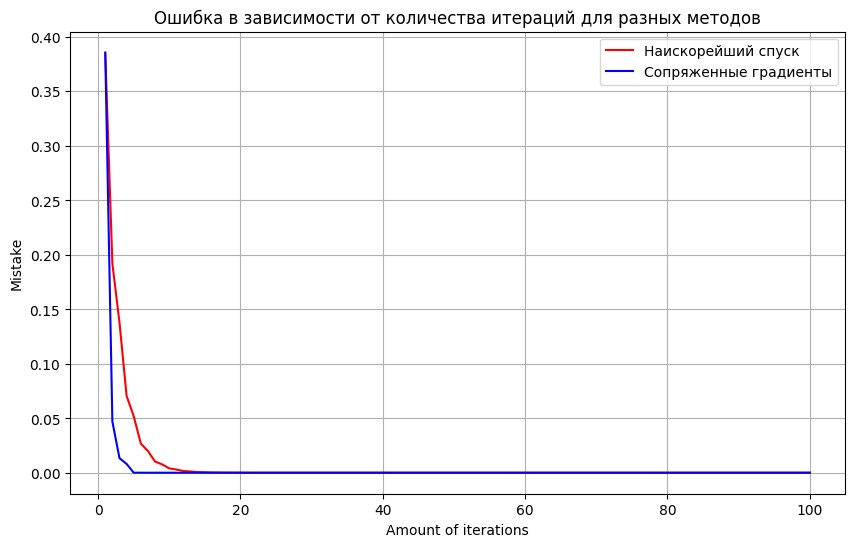

In [238]:
plt.figure(figsize=(10,6))
plt.xlabel('Amount of iterations')
plt.ylabel('Mistake')
plt.title('Ошибка в зависимости от количества итераций для разных методов')
plt.grid(True)
plt.plot(fastest_descent_test(func, grad_func, [-1,-1], array_true_2)[0], fastest_descent_test(func, grad_func, [-1,-1], array_true_2)[1], color='r', label='Наискорейший спуск')
plt.plot(conjugate_gradients_test(func, grad_func, [-1,-1], array_true_2)[0], conjugate_gradients_test(func, grad_func, [-1,-1], array_true_2)[1], color='b', label='Сопряженные градиенты')
plt.legend()
plt.show()

Тут стоит отметить, что правильное решение задачи сильно зависит от выбранного нулевого приближения, поскольку в неудачном случае, методы покажут значение точки, в которой функция имеет локальный минимум, но вовсе не принимает значение ноль.